# Convex Optimisation
## Homework 3

Answers/code by Raphael Reme

### Question 1: Find the dual of the Lasso Problem

$$P: \text{minimize}_{w}\;\;\; \frac{1}{2}||Xw - y||_2^2 + \lambda ||w||_1$$
$$\begin{equation*}
    \begin{split}
        P \Leftrightarrow&\;\; \text{minimize}_{w, z} & \;\;\;\frac{1}{2}||z||_2^2  + \lambda ||w||_1\\
        &\;\;\text{subject to}&\;\;\;Xw - y - z = 0 
    \end{split}
\end{equation*}$$

The lagrangian is $\mathcal{L}(w, z, \nu) = \frac{1}{2}||z||_2^2  + \lambda ||w||_1 + \nu^T(Xw - y - z)$.

And the dual function is $g(\nu) = \inf_{w, z}\mathcal{L}(w,z,\nu) = -\nu^Ty + \frac{1}{2} \inf_z(||z||_2^2 - 2\nu^Tz) + \inf_w (\lambda||w||_1 + \nu^TXw)$.

First: $\frac{1}{2} \inf_z||z||_2^2 - 2\nu^Tz = \frac{1}{2} \inf_z||z - \nu||_2^2 - ||\nu||_2^2 = -\frac{1}{2}||\nu||_2^2$.

Then: $\inf_w \lambda||w||_1 + \nu^TXw = \inf_w \sum_j \lambda |w_j| + \sum_{i,j}\nu_iX_{ij}w_j$.

With $\begin{equation}
    \text{sign}(x)=
    \begin{cases}
      1 & \text{if  } x \ge 0\\
      -1 & \text{otherwise}\\
    \end{cases}       
\end{equation}$. We can state that  $|x| = \text{sign}(x)x$.

Therefore $\inf_w \lambda||w||_1 + \nu^TXw = \sum_j \inf_{w_j} \big(\text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij}\big)w_j$.

Let's assume that $\exists j,\,\sum_i \nu_iX_{ij} > \lambda$. Then with $w_j > 0,\, \text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij} < 0$ And $\big(\text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij}\big)w_j \rightarrow_{w_j \rightarrow \infty} -\infty$

Let's assume that $\exists j,\,\sum_i \nu_iX_{ij} < - \lambda$. Then with $w_j < 0,\, \text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij} > 0$ And $\big(\text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij}\big)w_j \rightarrow_{w_j \rightarrow -\infty} -\infty$

With $\forall j,\, -\lambda \le \sum_i \nu_iX_{ij} \le \lambda$, either with $w_j \ge 0,\, \text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij} \ge 0$ And $\big(\text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij}\big)w_j \ge 0$. Or with $w_j \le 0,\, \text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij} \le 0$ And $\big(\text{sign}(w_j)\lambda + \sum_i \nu_iX_{ij}\big)w_j \ge 0$.

In both case, $\inf_{w_j} = 0$ (reached with $w_j = 0$)

The dual problem is therefore:

$$\begin{equation*}
    \begin{split}
        D:&\;\; \text{maximize}_{\nu} & \;\;\;-\frac{1}{2}||\nu||_2^2  - \nu^Ty\\
        &\;\;\text{subject to}&\;\;\;-\lambda \le \nu^TX \le \lambda 
    \end{split}
\end{equation*}$$

$$\begin{equation*}
    \begin{split}
        D \Leftrightarrow&\;\; \text{minimize}_{\nu} & \;\;\;\frac{1}{2}\nu^T\nu  + y^T\nu\\
        &\;\;\text{subject to}&\;\;\;X^T\nu \le \lambda, -X^T\nu \le \lambda  
    \end{split}
\end{equation*}$$

$$\begin{equation*}
    \begin{split}
        D \Leftrightarrow&\;\; \text{minimize}_{\nu} & \;\;\;\nu^TQ\nu  + p^T\nu\\
        &\;\;\text{subject to}&\;\;\;A\nu \le b
    \end{split}
\end{equation*}$$

With $A = \begin{pmatrix} X^T \\ -X^T \end{pmatrix}$, $b = \lambda \mathcal{1}_{2d}$, $p = y$ and $Q = \frac{1}{2} I_n$.

### Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The centering step of the barrier method consists in solving the following problem:

$$\begin{equation*}
    \begin{split}
        \text{minimize}_{\nu} & \;\;\;t(\nu^TQ\nu  + p^T\nu) - \log(b- A\nu)^T\mathcal{1}\\
    \end{split}
\end{equation*}$$

Let's call $f_t(\nu) = t(\nu^TQ\nu  + p^T\nu) - \log(b- A\nu)^T\mathcal{1} = tf_0(\nu) - C(\nu)$. Where C is the cost induce by the barriers and f_0 our real objective function.

One can easily compute the gradient and the hessian of $f_0$ (Assuming $Q \in S_n^+$): $\nabla f_0(\nu) = 2Q\nu + p$. And $\nabla^2f_0(\nu) = 2Q$

Computing the deriavatives for C is also quite easy: $C(\nu) = \sum_i \log(b_i - \sum_j a_{ij}\nu_j)$

$\frac{\partial C}{\partial\nu_k}(\nu) = - \sum_i \frac{a_{ik}}{b_i - \sum_j a_{ij}\nu_j}$. And $\frac{\partial C}{\partial\nu_k\partial\nu_l}(\nu) = - \sum_i \frac{a_{ik}a_{il}}{(b_i - \sum_j a_{ij}\nu_j)^2}$

Let's introduce $\bar{A}_{ij} = \frac{a_{ij}}{b_i - \sum_k a_{ik}\nu_k}$, then we have: $\nabla C(\nu) = -\bar{A}^T\mathcal{1}$ and $\nabla^2C(\nu) = -\bar{A}^T\bar{A}$

Hence: $\nabla f_t(\nu) = t(2Q\nu + p) + \mathcal{1}^T \bar{A}$ and $\nabla^2 f_t(\nu)= 2tQ + \bar{A}^T\bar{A}$

In [2]:
# With this said, we can now code the Newton method for the centering steps

def vectorize(vector):
    """Reshape any array to be of size (n, 1). (Vertical point of view)

    Useful to be sure of our matricial dot/element-wise product.
    """
    return vector.reshape((vector.size, 1))

def centeringstep(Q, p, A, b, t, v0, eps):
    """Minimize t(v^T.Q.v + p^T.v) - log(b-A.v)^T.1 with the Newton method.

    Attrs:
        Q (Array nxn)
        p (Array nx1)
        A (Array mxn)
        b (Array mx1)
        t (float): Step in the barrier method.
        v0 (Array nx1): Initial point.
        eps (float): Precision on the solution.

    Returns:
        List[Array nx1]: The list of v values during the minimization. 
    """
    def f(v):
        return t * (v.T @ Q @ v + p.T @ v) - np.log(b - A @ v).sum()

    # backtracking parameters
    alpha = 0.25
    beta = 0.5

    ones = np.ones(b.shape)
    v = [v0]
    while True:
        # Compute Hessian and gradient
        A_bar = A / (b - A @ v[-1])
        grad = t * (2*Q @ v[-1] + p) + A_bar.T @ ones
        hessian = 2*t*Q + A_bar.T @ A_bar

        # Compute Newton step and decrement
        # dx = -Hess^-1.Grad and lambda2 = Grad.Hess^-1.Grad
        # <=> Hess.dx = -Grad and lambda2 = -Grad.dx
        dx = np.linalg.solve(hessian, -grad)
        lambda2 = -grad.T @ dx

        # Stopping criterion
        if lambda2/2 <= eps:
            break

        # Backtracking line search
        u = 1
        while (b - A @ (v[-1] + u*dx) <= 0).any() or f(v[-1] + u*dx) >= f(v[-1]) + u*alpha*grad.T @ dx:
            u *= beta

            # With too much precision it takes too much time. (we could stop directly but let's 
            # push things up to python's limits.)
            if u < 10e-20:
                # Not really intesting anymore... Let's accelerate a lot.
                u *= u
            if u == 0:
                print("Warning: Reached python's limits in backtracking line search...")
                print("Let's stop centering step here as we cannot update v anymore")
                return v[1:]

        # Update
        v.append(v[-1] + u*dx)
    return v[1:]

In [3]:
# Implement the barrier method for our problem

def barrmethod(Q, p, A, b, v0, eps, mu=2):
    """Minimize v^T.Q.v + p^T.v with the condition: A.v <= b.

    Attrs:
        Q (Array nxn)
        p (Array nx1)
        A (Array mxn)
        b (Array mx1)
        v0 (Array nx1): Initial point. (!Should be feasible!)
        eps (float): Precision on the solution.
        mu (float, optional): Hyperparameter of the barrier method.

    Returns:
        List[Array nx1]: The list of v values during the minimization.
        List[float]: Precision criterion for each v
    """
    # Be precise and check all sizes in order to avoid dummy errors.
    b = vectorize(b)
    p = vectorize(p)
    v0 = vectorize(v0)
    n = v0.shape[0]
    m = b.shape[0]
    assert A.shape == (m, n)
    assert Q.shape == (n, n)

    v = [v0]
    precision_crit = [m]
    t = 1
    while True:
        # Centering step starting at last v and with the new t.
        v.extend(centeringstep(Q, p, A, b, t, v[-1], eps))
        precision_crit.extend([m/t] * (len(v) - len(precision_crit)))

        # Stopping criterion
        if m/t < eps:
            break

        # Increase t
        t *= mu

    return v, precision_crit

### Question 3 

#### Toy example in 2D

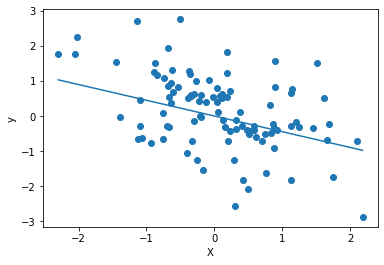

In [4]:
# In order to have reproducible results.
np.random.seed(1)

n = 100
d = 1

# Parameters
lambda_ = 10
eps = 10e-8

# Generate data from a noised linear model.
X = np.random.normal(0, 1, size=(n,d))
w = np.random.normal(0, 1, size=(d, 1))
y = X @ w + np.random.normal(0, 1, size=(n,1))  # Y = Xw + gaussian noise.

# Let's plot the data
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y)
plt.plot([np.min(X), np.max(X)], [w[0,0] * np.min(X), w[0,0] * np.max(X)])
plt.show()

In [5]:
def dualize(X, y):
    """Compute Q, A, b, p of the dual problem from the primal point of view."""
    n, d = X.shape
    Q = 0.5 * np.identity(n)
    A = np.concatenate((X.T, -X.T), axis=0)
    b = lambda_ * np.ones((2*d, 1))
    return Q, A, b, y

Q, A, b, p = dualize(X, y) 

In [6]:
# Feasible starting point. (0 is clearly feasible!)

v0 = np.zeros((n, 1))

print("Inside boundaries:", (A @ v0 < b).all())

Inside boundaries: True


In [7]:
v, precision_crit = barrmethod(Q, p, A, b, v0, eps)

As we can see the problem is convex and strictly feasible. 

Therefore strong duality holds. (Slater’s constraint qualification).

Let's have $f_0(w, z) = \frac{1}{2}||z||_2^2 + \lambda||w||_1$ and $h(w, z) = Xw - y - z$. The lagrangian is $\mathcal{L}(w, z, \nu) = f_0(w, z) + \nu^Th(w, z)$.

With strong duality, we have $(w^\star, z^\star) \in \text{arg}\min_{w, z} \mathcal{L}(w, z, \nu^\star)$:


<!-- The primal minimize $f_0$ with the condition $h \le 0$. Then the KKT condition for the optimal point says: -->
$$\begin{equation*}
    \begin{split}
        \text{(1)   }&w^\star \in \text{arg}\min_{w} \lambda||w||_1 + \nu^TXw\\
        \text{(2)   }&z^\star \in \text{arg}\min_{z} \frac{1}{2}||z||_2^2 - \nu^Tz\\
    \end{split}
\end{equation*}$$

Then from (2) using derivatives  w.r.t $z$ we have $z^\star = \nu^\star$.

And (1) can be written as:

$$w^\star \in \text{arg}\min_{w} ||w||_1 + \frac{(X^T\nu)^Tw}{\lambda}$$

Let's have $u = \frac{1}{\lambda}X^T\nu$ then:

$$(1) \Leftrightarrow w^\star \in \text{arg}\min_{w} \sum_i |w_i| + u_iw_i$$
$$(1) \Leftrightarrow \forall i,  w_i^\star \in \text{arg}\min_{w} |w_i|(1 + \text{sign}(w_i)u_i)$$

As $\forall i, |u_i| \le 1$ (Because $\nu^\star$ is such that $-\lambda \le X^T\nu^\star \le \lambda$), $1 + \text{sign}(w_i)u_i \le 0$. And therefore we have $1 + |u_i| \ne 0 \Rightarrow w_i^\star = 0$

Finally we get a condition on $w_i^\star$ which is $w_i^\star = 0 \text{ if } |X^T\nu|_i \ne \lambda$.

Moreover as the optimal point is feasible, we also have: $Xw^\star - y - z^\star = 0 \Leftrightarrow Xw^\star = y + \nu^\star$.

Let's defined $(j_k)_k$ the ordered sequence of indexes such as $|X^T\nu|_{j_k} = \lambda$. Then we can defined $X'$ and $w'$ such that $X'_{ik} = X_{ij_k}$ and $w_k' = w_{j_k}^\star$. Then $Xw^\star = X'w'$ (As $w^\star_j = 0$ if $j \notin (j_k)_k$)  

It's then possible to compute $w'$ thanks to $X'w' = y + \nu^\star$ using a pseudo inverse/lstsq. And compute $w^\star$ from $w'$ and $(j_k)_k$.

In [8]:
def compute_w(X, y, v, lambda_, eps):
    J = (np.abs(lambda_ - X.T @ v) < eps) + (np.abs(lambda_ + X.T @ v) < eps)
    X_prime = X[:,J.flatten()]
    w_prime = np.linalg.lstsq(X_prime, y + v, rcond=-1)[0]
#     w_prime = np.linalg.pinv(X_prime) @ (y + v)  # ~ Equivalent to the previous line
    w = np.zeros((X.shape[1], 1))
    j = 0
    for i, elt in enumerate(J):
        if elt:
            w[i,0] = w_prime[j,0]
            j += 1
    assert (X @ w == X_prime @ w_prime).all()  # Sanity check
    return w

Lasso w -> L1_pen: 0.41803458000983457, MSE: 89.67208650500812, Primal objective: 49.016389052602406
Lstsq w -> L1_pen: 0.5450716495175008, MSE: 88.40171581898615, Primal objective: 49.65157440466808
Real w -> L1_pen: 0.4471285647859982, MSE: 89.15683775430202, Primal objective: 49.049704525010995


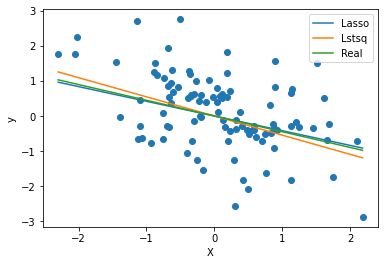

In [9]:
# Let's compare with ground truth and lstsq and visualize the data!

w_lasso = compute_w(X, y,v[-1], lambda_, eps)
w_rand = np.random.normal(0,1, (d,1))
w_lstsq = np.linalg.lstsq(X, y, rcond=-1)[0]

L = [("Lasso w", w_lasso), ("Lstsq w", w_lstsq), ("Real w", w)]

for name, w_ in L:
    l1_pen = np.sum(np.abs(w_))
    l2_loss = np.sum((X@w_ - y)**2)
    print(f"{name} -> L1_pen: {l1_pen}, MSE: {l2_loss}, Primal objective: {lambda_*l1_pen + 0.5*l2_loss}")
    
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y)
plt.plot([np.min(X), np.max(X)], [w_lasso[0,0] * np.min(X), w_lasso[0,0] * np.max(X)], label="Lasso")
plt.plot([np.min(X), np.max(X)], [w_lstsq[0,0] * np.min(X), w_lstsq[0,0] * np.max(X)], label="Lstsq")
plt.plot([np.min(X), np.max(X)], [w[0,0] * np.min(X), w[0,0] * np.max(X)], label="Real")
plt.legend()
plt.show()

It seems to work!

#### Example in higher dimension: n << d

Lasso w -> L1_pen: 153.2385211912341, MSE: 14.426050244336835, Primal objective: 1539.5982370345093
Lstsq w -> L1_pen: 350.0479434902976, MSE: 2.6251555431763787e-25, Primal objective: 3500.479434902976
Real w -> L1_pen: 3957.738343496918, MSE: 13.53968863637697, Primal objective: 39584.15327928736


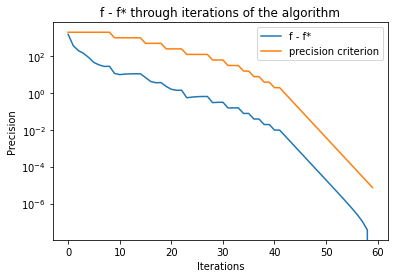

In [10]:
# In order to have reproducible results.
np.random.seed(1)

n = 10
d = 1000

lambda_ = 10
# With smaller eps the backtracing line search is a little bit too naive to handle it.
eps = 10e-6

# Generate data from a noised linear model.
X = np.random.normal(0, 1, size=(n,d))
w = np.random.normal(0, 5, size=(d, 1))
y = X @ w + np.random.normal(0, 1, size=(n,1))  # Y = Xw + gaussian noise.

# Solve the dual problem
Q, A, b, p = dualize(X, y)
v0 = np.zeros((n, 1))
v, precision_crit = barrmethod(Q, p, A, b, v0, eps, mu=2)

# Sanity check w.r.t ground truth and lstsq.
w_lasso = compute_w(X, y, v[-1], lambda_, eps)
w_lstsq = np.linalg.lstsq(X, y, rcond=-1)[0]

L = [("Lasso w", w_lasso), ("Lstsq w", w_lstsq), ("Real w", w)]

for name, w_ in L:
    l1_pen = np.sum(np.abs(w_))
    l2_loss = np.sum((X@w_ - y)**2)
    print(f"{name} -> L1_pen: {l1_pen}, MSE: {l2_loss}, Primal objective: {lambda_*l1_pen + 0.5*l2_loss}")

# Plot the evolution f - f*
def f(Q, p, v):
    return v.T @ Q @ v + p.T @ v

f_star = f(Q, p, v[-1])[0,0]

plt.ylabel("Precision")
plt.xlabel("Iterations")
plt.title("f - f* through iterations of the algorithm")
plt.yscale("log")
plt.plot(range(len(v)), [f(Q, p, v_i)[0,0] - f_star for v_i in v], label="f - f*")
plt.plot(range(len(precision_crit)), precision_crit, label="precision criterion")
plt.legend()
plt.show()

In [11]:
# Check sparsity
print("% non zero coeff in w_lasso:", np.sum(w_lasso != 0)/w.size)

% non zero coeff in w_lasso: 0.01


### Impact of mu on w

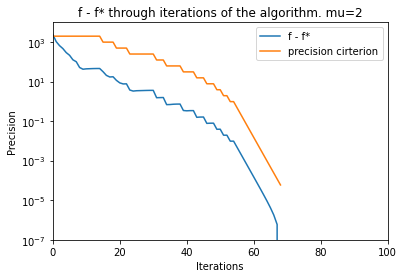

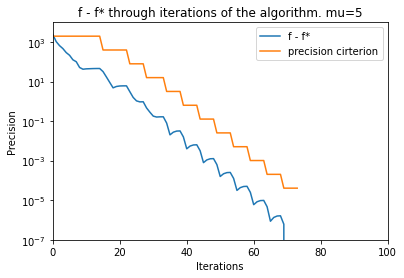

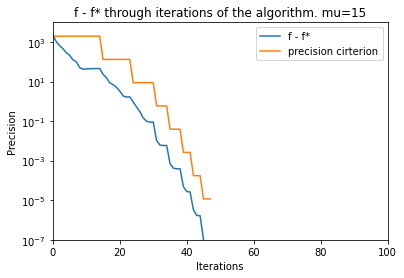

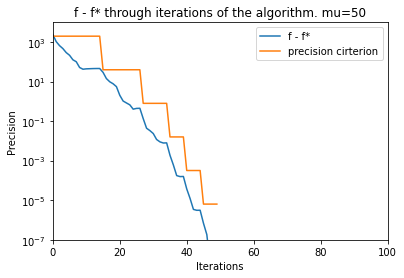

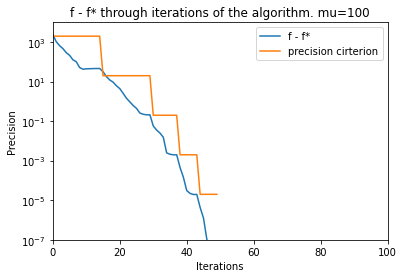

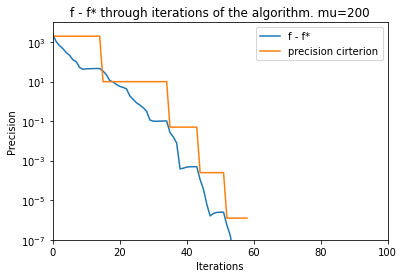

In [12]:
# In order to have reproducible results.
np.random.seed(1)

n = 20
d = 1000

lambda_ = 10
eps = 10e-5

# Generate data from a noised linear model.
X = np.random.normal(0, 1, size=(n,d))
w = np.random.normal(0, 5, size=(d, 1))
y = X @ w + np.random.normal(0, 1, size=(n,1))  # Y = Xw + gaussian noise.

# Solve the dual problem with different mu
Q, A, b, p = dualize(X, y)
v0 = np.zeros((n, 1))

results = {
    mu: barrmethod(Q, p, A, b, v0, eps, mu) for mu in [2, 5, 15, 50, 100, 200]
}

w_lassos = {
    mu: compute_w(X, y, results[mu][0][-1], lambda_, eps) for mu in results
}

# Plot the evolution f - f* for each mu
def f(Q, p, v):
    return v.T @ Q @ v + p.T @ v


for mu in results:
    plt.ylabel("Precision")
    plt.xlabel("Iterations")
    plt.title(f"f - f* through iterations of the algorithm. mu={mu}")
    plt.yscale("log")
    plt.xlim(0, 100)
    plt.ylim(1e-7, 1e4)
    v, precision_crit = results[mu]

    f_star = f(Q, p, v[-1])[0,0]
    plt.plot(range(len(v)), [f(Q, p, v_i)[0,0] - f_star for v_i in v], label="f - f*")
    plt.plot(range(len(v)), precision_crit, label="precision cirterion")
    plt.legend()
    plt.show()

In [13]:
all_equal = True
mus = list(w_lassos.keys())
for i in range(len(mus) - 1):
    mu_1 = mus[i]
    mu_2 = mus[i+1]
    all_equal &= np.allclose(w_lassos[mu_1], w_lassos[mu_2])
all_equal

True

It seems that the mu parameter does not have impact on the resulting w. (At least for the small trials that I have conducted.)

One can see that on the other hand it has an impact on the evolution of the objective function. It smooth but take more iterations with mu=2. Then It seems to be much more noisy for larger mu and stabilizing again for mu > 15. For mu from 15 to 50 it seems to have a faster convergence and be less noisy.

A good choice would proably be 15 <= mu <= 50 (Having mu greater than 50 seems to have no more impact on the convergence speed and rather bring more noise in the convergence.)